<a href="https://colab.research.google.com/github/nshea3/DS109_Python3_Solutions/blob/master/Libya_paleocene_clastics_thickness/Libya_paleocene_clastics_thickness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Geostatistical Analysis of Libyan Clastic Thickness

After [*Geostatistical Analysis of Libyan Clastic Thickness*](http://www.wvgs.wvnet.edu/www/geostat/Libya3.PDF) by Hohn (1999).



In [0]:
import pandas as pd

In [2]:
thickness_df = pd.read_csv('https://raw.githubusercontent.com/nshea3/geostats/master/Libya_paleocene_clastics_thickness/data/appb.txt', delim_whitespace=True, skiprows = 6, names=['Index', 'Easting', 'Northing', 'Thickness'])
thickness_df.head()

,Index,Easting,Northing,Thickness
0,1,0.0,24.0,1848
1,2,2.5,20.0,1806
2,3,4.0,25.0,2220
3,4,1.0,11.0,2513
4,5,6.0,0.0,3209


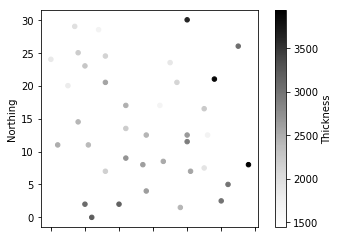

In [3]:
import matplotlib.pyplot as plt

%matplotlib inline

ax = thickness_df.plot.scatter('Easting', 'Northing', c='Thickness')
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.set_aspect(abs(x1-x0)/abs(y1-y0))

In [4]:
!pip install geostatspy

     |████████████████████████████████| 51kB 3.3MB/s 


In [0]:
from geostatspy.geostats import declus

Cell declustering explained via [Clayton Deutsch's Geostatistics Lessons](http://www.geostatisticslessons.com/lessons/celldeclustering.html).

There are 39 data with:
   mean of      2489.897435897436 
   min and max  1439 and 3941
   standard dev 586.624931275023 


(39,)

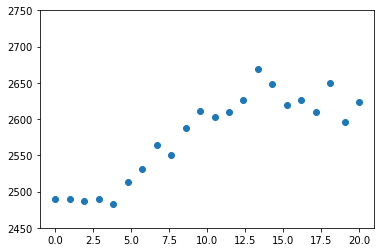

In [6]:
wtopt, xcs_mat, vrcr_mat = declus(thickness_df, 'Easting', 'Northing', 'Thickness', 0, 5, 20, 1, 20)


ax = plt.subplot()
ax.plot(xcs_mat, vrcr_mat, 'o')
ax.set_ylim([2450,2750])

wtopt.shape

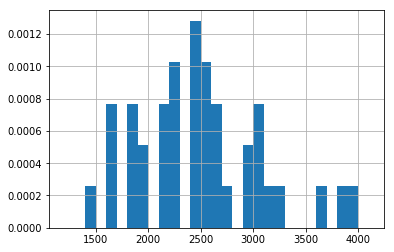

In [17]:
thickness_df['Thickness'].hist(bins=range(1200,4200,100), density=True)

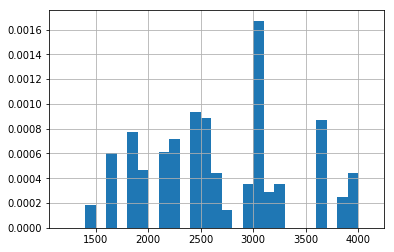

In [19]:
import numpy as np

sum_weights = sum(wtopt)
thickness_df['Thickness'].hist(bins=range(1200,4200,100), density=True, weights=wtopt)

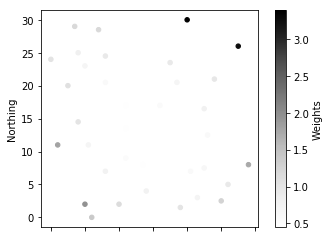

In [16]:
thickness_df['Weights'] = wtopt

ax = thickness_df.plot.scatter('Easting', 'Northing', c='Weights')
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.set_aspect(abs(x1-x0)/abs(y1-y0))

(array([17., 11.,  5.,  1.,  2.,  1.,  0.,  0.,  0.,  2.]),
 array([0.44705387, 0.74179293, 1.03653199, 1.33127104, 1.6260101 ,
        1.92074916, 2.21548822, 2.51022727, 2.80496633, 3.09970539,
        3.39444444]),
 <a list of 10 Patch objects>)

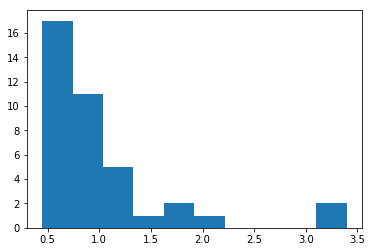

In [9]:
plt.hist(wtopt)

In [20]:
!pip install scikit-gstat

     |████████████████████████████████| 51kB 3.1MB/s 
  Created wheel for scikit-gstat: filename=scikit_gstat-0.2.5-cp36-none-any.whl size=55990 sha256=34f418c5e09eaa21d6b7674888e10f7b3e965e1b5a10968bda1f5d612d29e913
  Stored in directory: /root/.cache/pip/wheels/c7/3b/b6/e9cb77c076c95123211d9961902894d9152055a0422ee9348d
Successfully built scikit-gstat


In [0]:
import skgstat as skg

V = skg.Variogram(coordinates=np.array(thickness_df[['Easting','Northing']]), values=thickness_df['Thickness'], maxlag=20)


/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


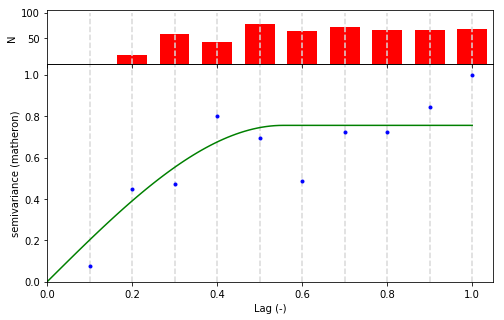

In [32]:
plt = V.plot()